# Conformado campo cercano

**@Author**: Luis Miguel Sánchez Brea

**@Date**:   15/10/2020

**Information**: R. W. Gerchberg and W. O. Saxton, “A Practical Algorithm for the Determination of Phase from Image and Diffraction Plane Pictures,” Optik (Stuttg)., vol. 35, no. 2, pp. 237–246, 1972. 

## Introduction
Vamos a realizar un sistema multilente pero con multiplexación de fase. Lo hacemos con el algorithm de Gerchberg-Saxton a una distancia finita (focal) y con el objetivo de puntos. 

He comprobado que si ponemos un único punto la máscara es una lente de fresnel
* Para distancias cortas, las multilentes se multiplexan en el espacio.
* Para distanas medias, quedan multiplexadas en la fase, es decir, se combinan en todos.
* Para distancias largas, quedan una serie de cuadraditos, como si fueran redes de Dammann, pero no es periódico ya que a los bordes quedan distintas.

In [1]:
from diffractio import um, mm, nm, np, sp, plt, degrees
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from py_aocg.ifta.algorithms import GS_scalar_Fresnel, verify_mask, compute_error

## Mask

In [2]:
num_x=512
num_y=512
pixel_size=10*um
DOE_size=pixel_size*num_x

x=np.linspace(-DOE_size/2,DOE_size/2, num_x)
y=np.linspace(-DOE_size/2,DOE_size/2, num_y)
wavelength=0.6328*um

(<Figure size 500x500 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x7f52085cf670>)

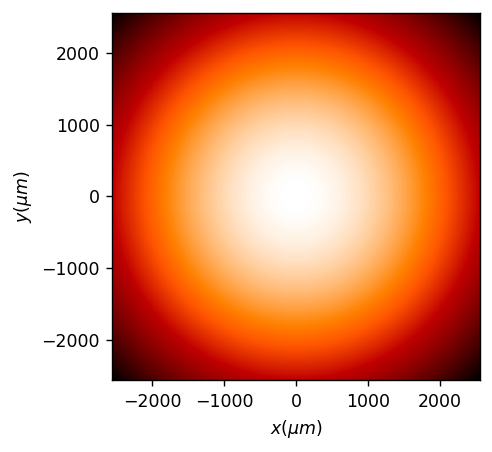

In [3]:
source=Scalar_source_XY(x,y,wavelength)
# source.plane_wave()
source.gauss_beam(r0=(0,0), w0=2500*mm, z0=0.0)

source.draw()

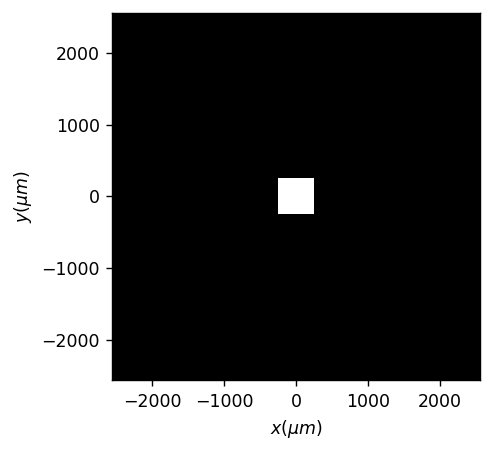

In [4]:
target=Scalar_mask_XY(x,y,wavelength)
target.square(r0=(0,0), size=(500,500), angle=0*degrees)
#target.square_circle(r0=(0,0), R1=500, R2=500, s=0.999, angle=0)

target.draw();

## Computation - continuous

In [5]:
z_distance=200*mm
num_steps=50

In [6]:
mask_final, errors = GS_scalar_Fresnel(None,target, z=z_distance,   num_steps=num_steps)

(0.0, 0.008174785100608564)

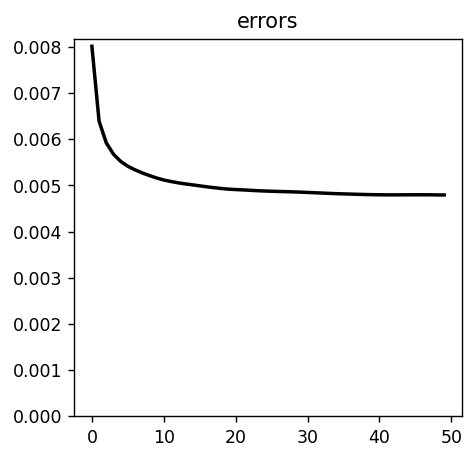

In [7]:
plt.plot(errors,'k', lw=2)
plt.title('errors'); plt.ylim(ymin=0)

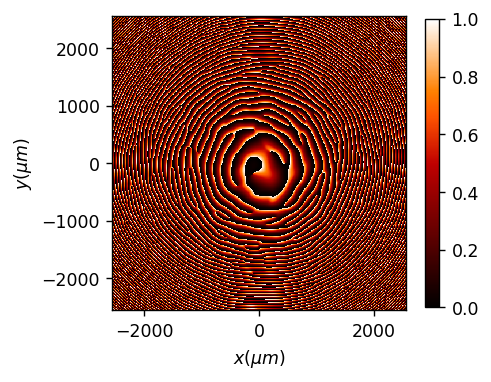

In [8]:
mask_final.draw('intensity', has_colorbar='vertical');

In [9]:
mask_final.save_mask(filename='conformado_near_field_c.bmp', kind='amplitude', binarize=False, info='Teluro ');

### Verification phase

In [10]:
# Parameters
has_mask=False

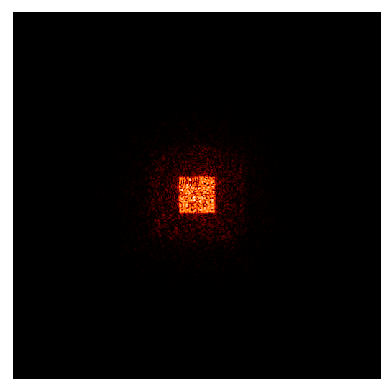

In [11]:
verify_mask(x,y, wavelength, filename='conformado_near_field_c.bmp', z=z_distance, 
            has_mask=True, is_phase=True, is_binary=False, has_draw=True);

### Verification amplitude

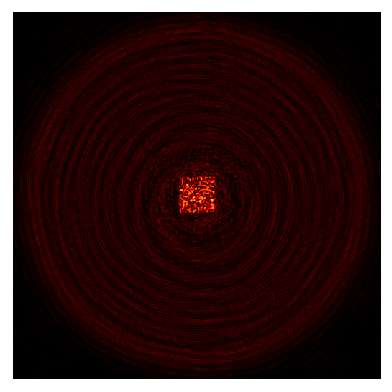

In [12]:
verify_mask(x,y, wavelength, filename='conformado_near_field_c.bmp',
            z=z_distance, has_mask=True, is_phase=False, is_binary=False, 
            has_draw=True);

## Computation - binary

In [13]:
mask_final.binarize(corte=0.5);

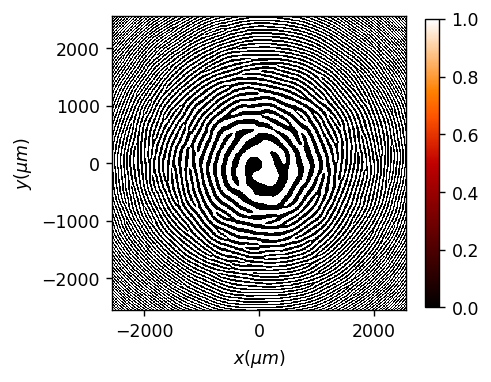

In [14]:
mask_final.draw('intensity', has_colorbar='vertical');

In [15]:
mask_final.save_mask(filename='conformado_near_field_b.bmp', kind='amplitude', binarize=False, info='Teluro ');

### Verification phase

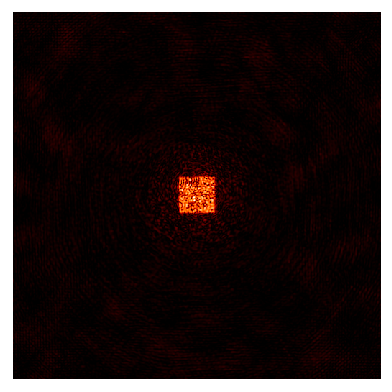

In [16]:
verify_mask(x,y, wavelength, filename='conformado_near_field_b.bmp', 
            z=z_distance, has_mask=True, is_phase=True, is_binary=True, has_draw=True);

### Verification amplitude

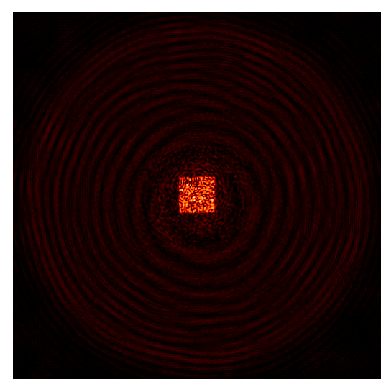

In [17]:
verify_mask(x,y, wavelength, filename='conformado_near_field_b.bmp',
            z=z_distance, has_mask=True, is_phase=False, is_binary=True, has_draw=True);